# * Kurapati Venkatesh

# * 09012021

# * Topic: Lasso & Ridge Regression  ✨🐱‍🏍

# ---------------------------------------------------------------------------

## Problem Statement:

## Data of various countries and the factors affecting their Life expectancy has been recorded over past few decades. An analytics firm would like to know how it varies country wise and what other factors are influential in model building. Use your skills to analyze the data and build a Lasso and Ridge Regression model and also summarize the output of the model.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To perform the Lasso and Ridge regression on the given data to predict the prices of the gadgets/ Laptops if they wants to sell them.

## -------------------------------------------------------------------------------------------

## import libraries:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

## Loading packages:

The following packages have been imported NymPy, Pandas, Matplotlib, Scipy, Seaborn. Sklearn is the most widely used package for the machine learning process. The fallowing subpackages have been used:

- train_test_split
- linear_model
- model_selection
- metrics
- tree
- ensemble
- preprocessing

In [3]:
life_data = pd.read_csv(r"G:\360digit\assignments meterial\lasso ridge regression\Life_expectencey_LR.csv", sep = ',')

In [4]:
life_data = life_data.drop('Year', axis = 1)

## Reading the data:

The data is saved as a csv file as LifeExpectancy.csv and it is read and stored in the life_data variable.The Year column is dropped as it will not be used in the analysis. Below the first 5 rows are shown. The data contains 21 columns and 2938 rows with the header row. The table contains data about:

1. Country
2. Status
3. Life Expectancy
4. Adult Mortality
5. Alcohol
6. percentage expenditure
7. Hepatitis B
8. Measles
9. BMI
10. under-five deaths
11. Polio
12. Total expenditure
13. Diphtheria
14. HIV/AIDS
15. GDP
16. Population
17. thinness 1-19 years
18. thinness 5-9 years
19. Income composition of resources
20. Schooling


With the exclution of Country name and Status(either developed or developing) all of the data is numeric. The values are either in years, precentages, millions or dollars in the case of Gross Domestic Product (GDP)

In [5]:
life_data.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
status = pd.get_dummies(life_data.Status)

In [7]:
life_data = pd.concat([life_data, status], axis = 1)

In [8]:
life_data = life_data.drop(['Status'], axis=1)

In [9]:
life_data.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling,1,Developing
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [10]:
life_data = life_data.groupby('Country').mean()

In [11]:
life_data.head()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,...,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


## EDA:

In [12]:
life_data.columns

Index(['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness', 'thinness_yr',
       'Income_composition', 'Schooling', 'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'Life_expectancy')

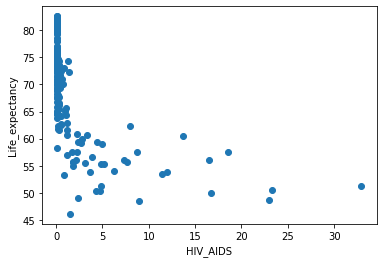

In [13]:
plt.scatter(life_data['HIV_AIDS'], life_data['Life_expectancy'])
plt.xlabel('HIV_AIDS')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life expectancy')

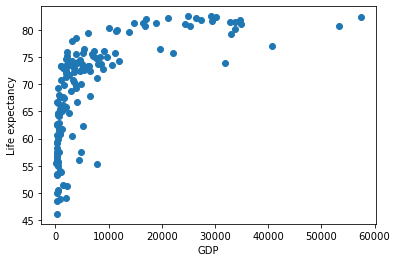

In [14]:
plt.scatter(life_data.GDP, life_data['Life_expectancy'])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life_expectancy')

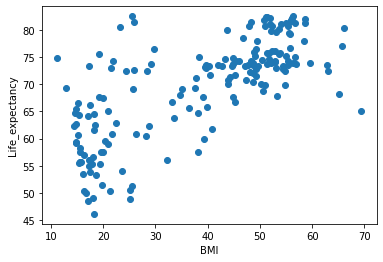

In [16]:
plt.scatter(life_data['BMI'], life_data['Life_expectancy'])
plt.xlabel('BMI')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life_expectancy')

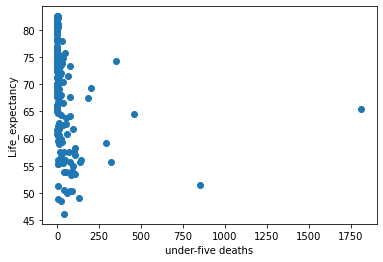

In [19]:
plt.scatter(life_data['under_five_deaths'], life_data['Life_expectancy'])
plt.xlabel('under-five deaths')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life_expectancy')

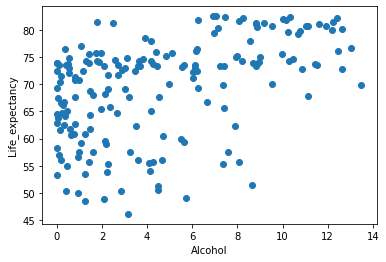

In [20]:
plt.scatter(life_data['Alcohol'], life_data['Life_expectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life_expectancy')

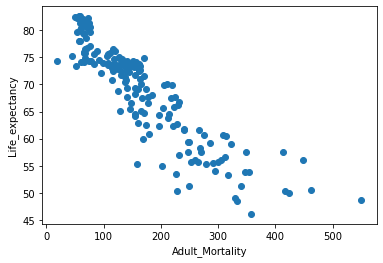

In [21]:
plt.scatter(life_data['Adult_Mortality'], life_data['Life_expectancy'])
plt.xlabel('Adult_Mortality')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life_expectancy')

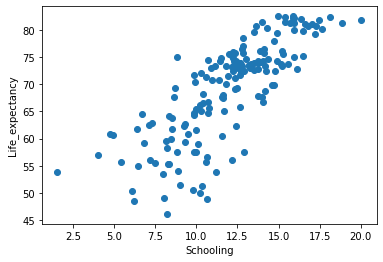

In [22]:
plt.scatter(life_data['Schooling'], life_data['Life_expectancy'])
plt.xlabel('Schooling')
plt.ylabel('Life_expectancy')

Text(0, 0.5, 'Life_expectancy')

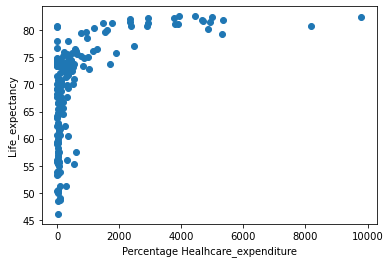

In [23]:
plt.scatter(life_data['percentage_expenditure'], life_data['Life_expectancy'])
plt.xlabel('Percentage Healhcare_expenditure')
plt.ylabel('Life_expectancy')

Using the scatter plot we plot the Life Expectancy against some other varyables to see if there is any correlation between them.


There seem to be a positive correlation between The Percentage of Healthcare Expenditure, Schooling, GDP and BMI and Life Expectancy, while there is a negative one between Adult Mortality, AIDS and Life Expectancy,there does not seem to have any correlation between Alcohol, under 5 years – old deaths and Life Expectancy.

<AxesSubplot:>

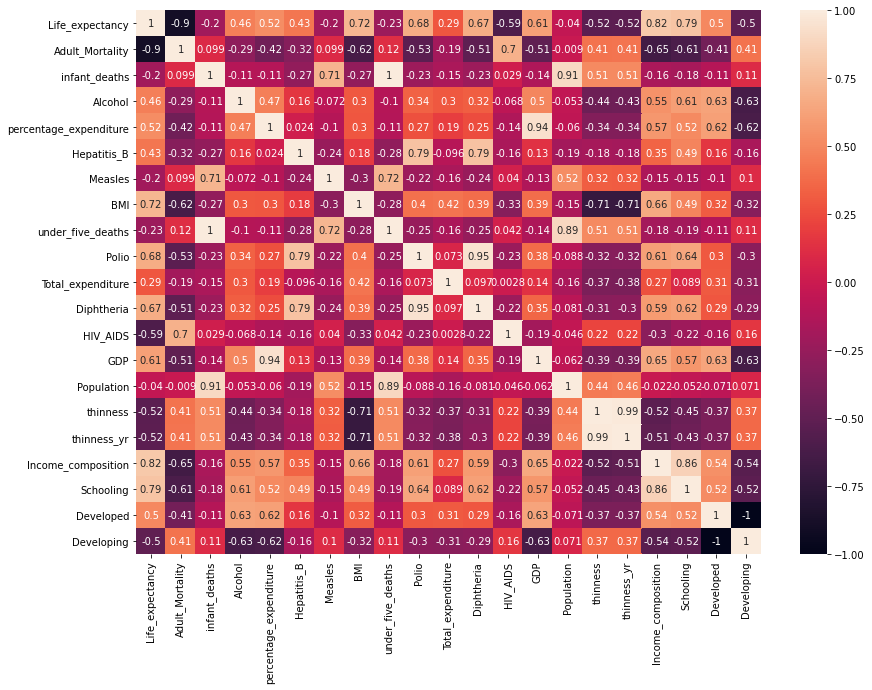

In [26]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

Now we will plot the correlation matrix visulizing it with a heatmap. The legend tells that the warmer colors show higher and positive correlation, while the colder low or negative.


There is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

## Preprocessing the data:

The raw data is not suitable for us to start building a model so some preprocessing will be done. First the Status of the country is turned into numberical with the get_dummies function, so we get 2 new columns. The original column is being dropped. Second the data is being grouped by the country and we find the mean values during the 2000 – 2015 year period.


Then the Life expectancy column is removed to form the life_labels variable or the output, and the rest is stored as the life_features variable. Now we consider that we have some null values in the table, the isnull function has been used to find the with the boolean True. Below that the number of null values are displayed in each separate column. It is mostly situated in the Population and GDP columns.


Now the missing values are filled with the mean of its respective column. This will create some distortions, but the other option in removing parts of the table will shrink the data so it will be avoided here because the number of rows is not that high. The final shape for the life_features is 193 rows to 20 columns. Finally considering the large differences in the values of the columns, there will be some scaling with the MinMaxScaler function.


Now we will split the data into a training part of 70% and a testing of 30%. Cross validation will be initialized with the creation of 5 fold split.

In [29]:
life_labels = life_data['Life_expectancy']

In [30]:
life_features = life_data.drop('Life_expectancy', axis = 1)

In [31]:
life_features.isnull().head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [32]:
life_features.isnull().sum()

Adult_Mortality           10
infant_deaths              0
Alcohol                    2
percentage_expenditure     0
Hepatitis_B                9
Measles                    0
BMI                        4
under_five_deaths          0
Polio                      0
Total_expenditure          2
Diphtheria                 0
HIV_AIDS                   0
GDP                       30
Population                48
thinness                   4
thinness_yr                4
Income_composition        17
Schooling                 13
Developed                  0
Developing                 0
dtype: int64

In [33]:
life_labels.isnull().sum()

10

In [34]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [35]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [36]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [37]:
min_max_scaler = MinMaxScaler()

In [38]:
life_features = min_max_scaler.fit_transform(life_features)

In [39]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [41]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size = 0.3)

# Linear Regression and Lasso and Ridge Regression:

In [42]:
linear_model = LinearRegression()

In [43]:
linear_model.fit(life_features_train, life_labels_train)

LinearRegression()

In [44]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.93


In [45]:
linear_model_predict = linear_model.predict(life_features_test)

In [46]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [-27.97184301  64.84316124   2.85116834   0.82642444  -1.84169401
   2.82984021   4.71550732 -81.66727087  -1.35497275   1.61160616
   8.05162097  -4.95160306   2.35054926  13.15194059  -4.12831181
   5.10012619   5.53522374   3.33300279  -0.23958459   0.23958459]
Mean squared error: 5.32
Mean absolute error: 1.86
R_square score: 0.93


Several algorithms will be tried out. First the classical linear regression.


- The model is fitted first on the trained data the R square is 0.92 on the training data.Later its R square is checked on the testing data. 
- The score is 87 % in the iteration of writing. We also calculate the MAE (the modulus between the predicted and the real value) at 2.32 and the MSE (the same only put to the power of 2) at 9.8.
- Now we will try to have some changes to the initial model. We will use both the properties of the Ridge regression and the Lasso and eventually the ElasticNet to see if the score can be improved.

In [53]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38843e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47878e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38843e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47878e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.90
R^2 score: 0.92
Mean squared error: 5.32
Mean absolute error: 1.86


The Ridge Regression uses L2 regularization to minimize the weights of the coefficients, this is controlled with the hyperparameter alpha. Increasing the value of alpha decreases the weights of the coefficients.


We performed a grid search with cross-validation on the grid regression with alpha varying between 0 and 10 and having 3 max iterations of 10, 100 and 1000. Finally the best parameters here are alpha = 1, and max iterations = 10. The R square on the training data is 90% compared to 92 % on the standard linear model There is some improvement of the R square on the test data statistic 91% vs 87% the errors stayed the same. The MAE is 1.83 better and MSE is 6.05 again lower the classic linear regression

In [54]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.6723645886365, tolerance: 0.8676557704472319
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to us

Best Parameters: {'alpha': 0, 'max_iter': 100}
R^2 score on training data: 0.92
R^2 score: 0.93
Mean squared error: 5.32
Mean absolute error: 1.86


C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.8688706050654, tolerance: 1.1146797360374623
  model = cd_fast.enet_coordinate_descent(


- Best Parameters: {'alpha': 0, 'max_iter': 100}

    
- R^2 score on training data: 0.92

    
- R^2 score: 0.93

    
- Mean squared error: 5.32

    
- Mean absolute error: 1.86

The Lasso Regression uses the L1 regularization which reduces some coefficent weights to zero. Again the regularization is controlled with aplha, decreasing it reduces the weights, also at the same time the max iterations hyperparameter needs to be increased.


The best parameters for the Lasso Regression are alpha = 0, and max iterations set to 100. The R square is a little higher at 92 % on the training data and 92 % on the test data the errors continue to stay the same as the Ridge regression.

In [55]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.6723645886365, tolerance: 0.8676557704472319
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to us

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323.0521262588446, tolerance: 0.8835920777545123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to us

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 100}
R^2 score on training data: 0.92
R^2 score: 0.93
Mean squared error: 5.32
Mean absolute error: 1.86


C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.8688706050654, tolerance: 1.1146797360374623
  model = cd_fast.enet_coordinate_descent(


- Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 100}


- R^2 score on training data: 0.92


- R^2 score: 0.93


- Mean squared error: 5.32


- Mean absolute error: 1.86

The ElasticNet combines both L1 and L2 regularization of the previous regression types.


Finally the grid search concerning ElasticNet shows that it performs as well as the Lasso regression so far with alpha = 0, max iterations = 100 and the L1 ration set at 0.1. The R square and the errors remain the same as the Lasso Regression

## Linear Regression with Polynomial Features:

The Polynomial Features function has been used to get the interactions of the input variables only to the power of 2

In [56]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(life_features_train)
life_features_train_quad = quad_feature_transformer.transform(life_features_train)
life_features_test_quad = quad_feature_transformer.transform(life_features_test)

In [57]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, life_labels_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, life_labels_train)
print(accuracy_score_quad)

1.0


The Linear Regression is being tested on the training data with the new Polynomial Features, the accuracy is 1, meaning the model has learned all the data. An prediction for the life_features_test_quad variable has been made.

In [58]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [59]:
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, poly_model_quad_predict))

Mean squared error: 544.70
Mean absolute error: 8.48
R_square score: -6.51


All the errors are significantly higher then the privious models, and the R square is in this case negative (this happens only in sklearn). This is the worst performing model for now.

## Decision Tree Regression:

In [60]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(life_features_train, life_labels_train)

decision_tree_score = cross_val_score(decision_tree_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"% r2_score(life_labels_test, decision_tree_fit.predict(life_features_test)))

mean cross validation score: 0.80
score without cv: 1.00
R^2 score on the test data 0.83


- Now we will try the Decision Tree Regression. Cross Validation has been performed
- The R square on the training data is 1 meaning that the algorithm has learned the data by heart, with the cross validation the figure declines to 77% and using the test date we get 80%
- Now we use the algorithm to predict the values of the life_features_test.

In [61]:
decision_tree_model_predict = decision_tree_model.predict(life_features_test)

In [62]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, decision_tree_model_predict))

Best Parameters: {'min_samples_split': 5}
R^2 score on training data: 1.00
R^2 score: 0.81
Mean squared error: 12.24
Mean absolute error: 2.47


- After performing grid search with minimun samples split in the range between 2 and 10 we get the best split of 3.
- The R square on the training data is 98%, the algorithms has nearly leaned the data by hearth. 
- On the test data we get R square of 81 %, the MAE is 2.71 and MSE is 16.59. 
- This method is worse than the Elastic Net Regression

## Random Forest Regression:

In [63]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)

random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"
      %r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))

mean cross validation score: 0.90
score without cv: 0.99
R^2 score on the test data 0.86


- Now we will use the Random Forest Regression
- The alogorithm has learned 98% on the training data without cross validation and 88% with, the value is 92 % on the test data.

In [65]:
random_forest_model_predict = random_forest_model.predict(life_features_test)

In [66]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, random_forest_model_predict))

Best Parameters: {'min_samples_split': 7}
R^2 score on training data: 0.98
R^2 score: 0.87
Mean squared error: 10.32
Mean absolute error: 2.21


After performing grid search in the range 2 to 10 for the minimun samples split we get 2 for the split. The R square on the training is 98 % while on the test it is 91% and a MAE of 1.89 and MSE of 6.71.

# Conclusion:

After comparing all the algorithms we can conclude the Lasso and the Elastic Net Regression offer which are the same:

1. Best Parameters: {‘alpha’: 0, ‘max_iter’: 10}
2. R square on the test data of 92%
3. MAE of 1.83
4. MSE of 6.05

## References and Sources:

The following sources have been used:

1. https://www.kaggle.com/kumarajarshi/life-expectancy-who/data
2. Introduction to Machine Learning with Python by Andreas C. Müller & Sarah Guido
3. Labs of the course(coursera)
4. stack overflow
5. Lectures of the course